# Q1. Housing Price Prediction

Dataset Description: The data pertains to the houses found in each California district and some summary statistics about them based on the 1990 census data. It contains one instance per district block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

The goal of this task is to design a regression model to predict the median house value conditioned upon a set of input attributes corresponding to a particular California district block.

The attributes in the dataset are as follows; their names are self-explanatory:
     

    longitude (continuous): One of the coordinates that are used to identify the California district block
     

    latitude (continuous): One of the coordinates that are used to identify the California district block
     

    housing_median_age (continuous): Average age of the house in California district block
     

    total_rooms (continuous): Total number of rooms of all the houses in the California district block
     

    total_bedrooms (continuous): Total number of bedrooms of all the houses in the California district block
     

    population (continuous): Number of people residing in the district block
     

    households (continuous): Number of families in the district block
     

    median_income (continuous): Median income for households in the district block of houses (measured in tens of thousands of US Dollars)  
     

    ocean_proximity (categorical): Location of the house. Is it inland, near the bay, near the ocean, etc.  
     

    median_house_value.(continuous): Median house value within a district block (measured in US Dollars)

Our target variable will be median_house_value.  Use the rest of the fields mentioned above to predict the median_house_value.

## Import Libraries
Import all necessary libraries

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

### b. Data Loading / Preprocessing

#### i. Loading

1. Load the California housing dataset using `pandas.read_csv()` function and store it in the variable (i.e., a pandas dataframe) named `df’.

2. The resulting data frame should have the shape (20640, 10) indicating that there are 20640 rows and 10 columns.

In [87]:
# Reading data from CSV
df=pd.read_csv("housing.csv")

# Printing shape
df.shape

(20640, 10)

3. Find the missing values in the data frame. If any (i.e., even if one column in each instance / row has a missing value), drop the row using `pandas.DataFrame.dropna()` function. The resulting data frame should have the shape (20433, 10) indicating that there are 20433 rows and 10 columns.

In [88]:

# Dropping the NA values
df.dropna(inplace=True)

# Shape of DF
df.shape


(20433, 10)

4. Create a data frame `corr_df` by dropping the columns latitude, longitude, and ocean_proximity using the `pandas.DataFrame.drop()` function. Use the Pearson correlation to find the correlation of each remaining feature in the `corr_df` with the target variable `median_house_value` using the function `pandas.DataFrame.corrwith()`.

In [89]:
# Corr_df by dropping lattitude,longitude,ocean_proximity
corr_df = df.drop(['latitude', 'longitude', 'ocean_proximity'], axis=1)

# Calculating the Pearson correlation with the target variable 'median_house_value'
correlation_with_target = corr_df.corrwith(df['median_house_value'])

# Displaying the correlation values
print(correlation_with_target)

housing_median_age    0.106432
total_rooms           0.133294
total_bedrooms        0.049686
population           -0.025300
households            0.064894
median_income         0.688355
median_house_value    1.000000
dtype: float64


5. Create a data frame `X` of features (by dropping the column `median_house_value` from the original data frame) using the `pandas.DataFrame.drop()` function. Create a Series object of targets `Y` (by only considering the `median_house_value` column from the original data frame (Do NOT use the `corr_df` data frame in this step. Use the data frame which was obtained as a result of step 3 above).

In [90]:
# Creating the features DataFrame by dropping the target variable
X = df.drop('median_house_value', axis=1)

# Creating the target Series
Y = df['median_house_value']

# Displaying the first few rows of X and Y for verification
print(X.head())
print(Y.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income ocean_proximity  
0       322.0       126.0         8.3252        NEAR BAY  
1      2401.0      1138.0         8.3014        NEAR BAY  
2       496.0       177.0         7.2574        NEAR BAY  
3       558.0       219.0         5.6431        NEAR BAY  
4       565.0       259.0         3.8462        NEAR BAY  
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


#### ii. Data Visualization

1. Use `pandas.DataFrame.hist(bins = 50)` function for visualizing the variation on the columns housing_median_age, total_rooms, total_bedrooms, population, household, median_income and median_house_value. Plot each histogram as a separate subplot.

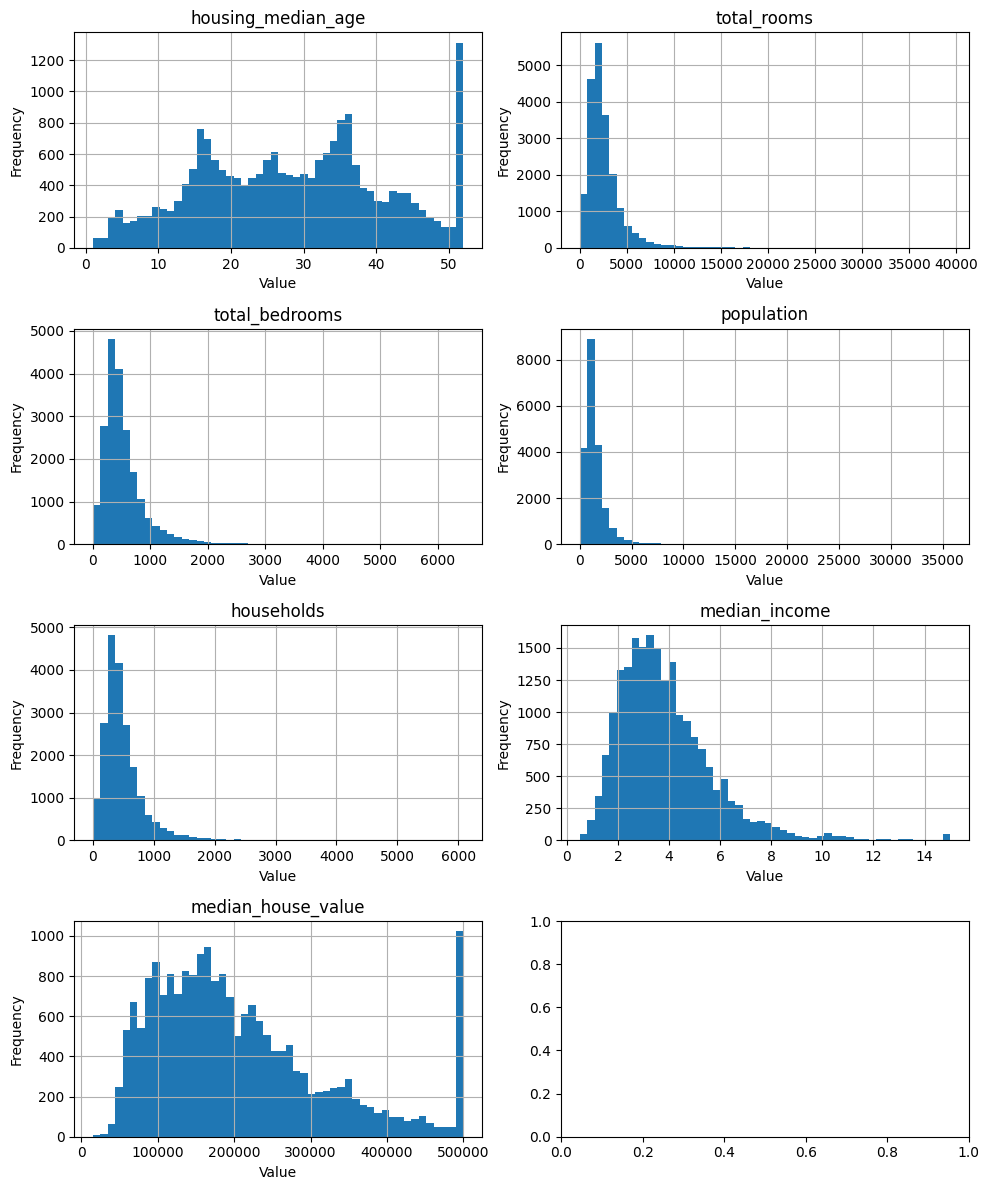

In [91]:
# Columns to be plotted
columns_to_plot = ['housing_median_age', 'total_rooms', 'total_bedrooms',
                   'population', 'households', 'median_income', 'median_house_value']

# Number of rows and columns for subplots
n_rows = len(columns_to_plot) // 2 + len(columns_to_plot) % 2
n_cols = 2

# Creating subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, n_rows * 3))

# Flattening the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    # Plotting the histogram for each column
    df[col].hist(bins=50, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Adjusting layout
plt.tight_layout()
plt.show()

2. Use `pandas.dataframe.describe()` function to find the mean, median and standard deviations for each feature and report in the jupyter notebook.

In [92]:
description = df.describe()

# Calculating the median for each feature
medians = df.median()

# Adding the median to the description DataFrame
description.loc['median'] = medians

# Displaying the result
description

<ipython-input-92-dc0cfd0167b6>:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medians = df.median()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000
median,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000


3. Use `pandas.get_dummies` to convert categorical variables into dummy /one-hot encoding. In this case the categorical column is ocean_proximity

In [93]:
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'])

# After this seprating feautures and target
X = df_encoded.drop('median_house_value', axis=1)
Y = df_encoded['median_house_value']



#### iii. Data Splitting

1. Split data into training and test sets using the sklearn `train_test_split()` function. Perform 70-30 distribution i.e. 70% training and 30% testing. The result of your data split should yield 4 separate data frames `X_train, X_test, y_train, y_test`. (respectively, the training features, testing features, training targets and testing target).

In [94]:
# Splitting the data into training and testing sets with a 70-30 distribution
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Displaying the shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (14303, 13)
X_test shape: (6130, 13)
y_train shape: (14303,)
y_test shape: (6130,)


#### iv. Data Scaling

1. Use the `StandardScaler()` to instantiate the standard scaler class. Note: You will need two separate scaler objects, one to scale the features, another to scale the target values.

In [95]:
# Create a StandardScaler instance for scaling features
scaler_features = StandardScaler()

# Create a separate StandardScaler instance for scaling the target
scaler_target = StandardScaler()

2. For each scaler, employ the `fit_transform()` function (only on the training  features, training targets) of the scaler to retrieve the new (scaled) version of the data. Store them in `X_train`, and `y_train` again

In [97]:
X_train_scaled = scaler_features.fit_transform(X_train)

# Scaling the training target
y_train_scaled = scaler_target.fit_transform(y_train.values.reshape(-1, 1))

# Overwrite the original training data with the scaled data

cols = X_train.columns.tolist()

# Convert the list of column names to a numpy ndarray
cols = np.array(cols)
X_train = X_train_scaled
y_train = y_train_scaled


3. Scale the `X_test` and `y_test` as well and store the scaled values back in `X_test` and `y_test`. (i.e., use the appropriate “fitted” scaler above to “transform” the test data. Note: the function to be employed in this case is `transform()` as opposed to `fit_transform()`).  
Henceforth, `X_train, y_train, X_test, y_test` will refer to the scaled data unless stated otherwise.

In [98]:
X_test_scaled = scaler_features.transform(X_test)

# Scaling the testing target
y_test_scaled = scaler_target.transform(y_test.values.reshape(-1, 1))

# Overwrite the original test data with the scaled data
X_test = X_test_scaled
y_test = y_test_scaled

4. Use `pandas.DataFrame.hist(bins = 50)` function for visualizing the variation of numerical attributes housing_median_age, total_rooms, total_bedrooms, population, household, median_income and median_house_value for the `X_train` and `y_train` dataset (similar to step b.ii.1 above). Once again, plot each histogram as a separate subplot.

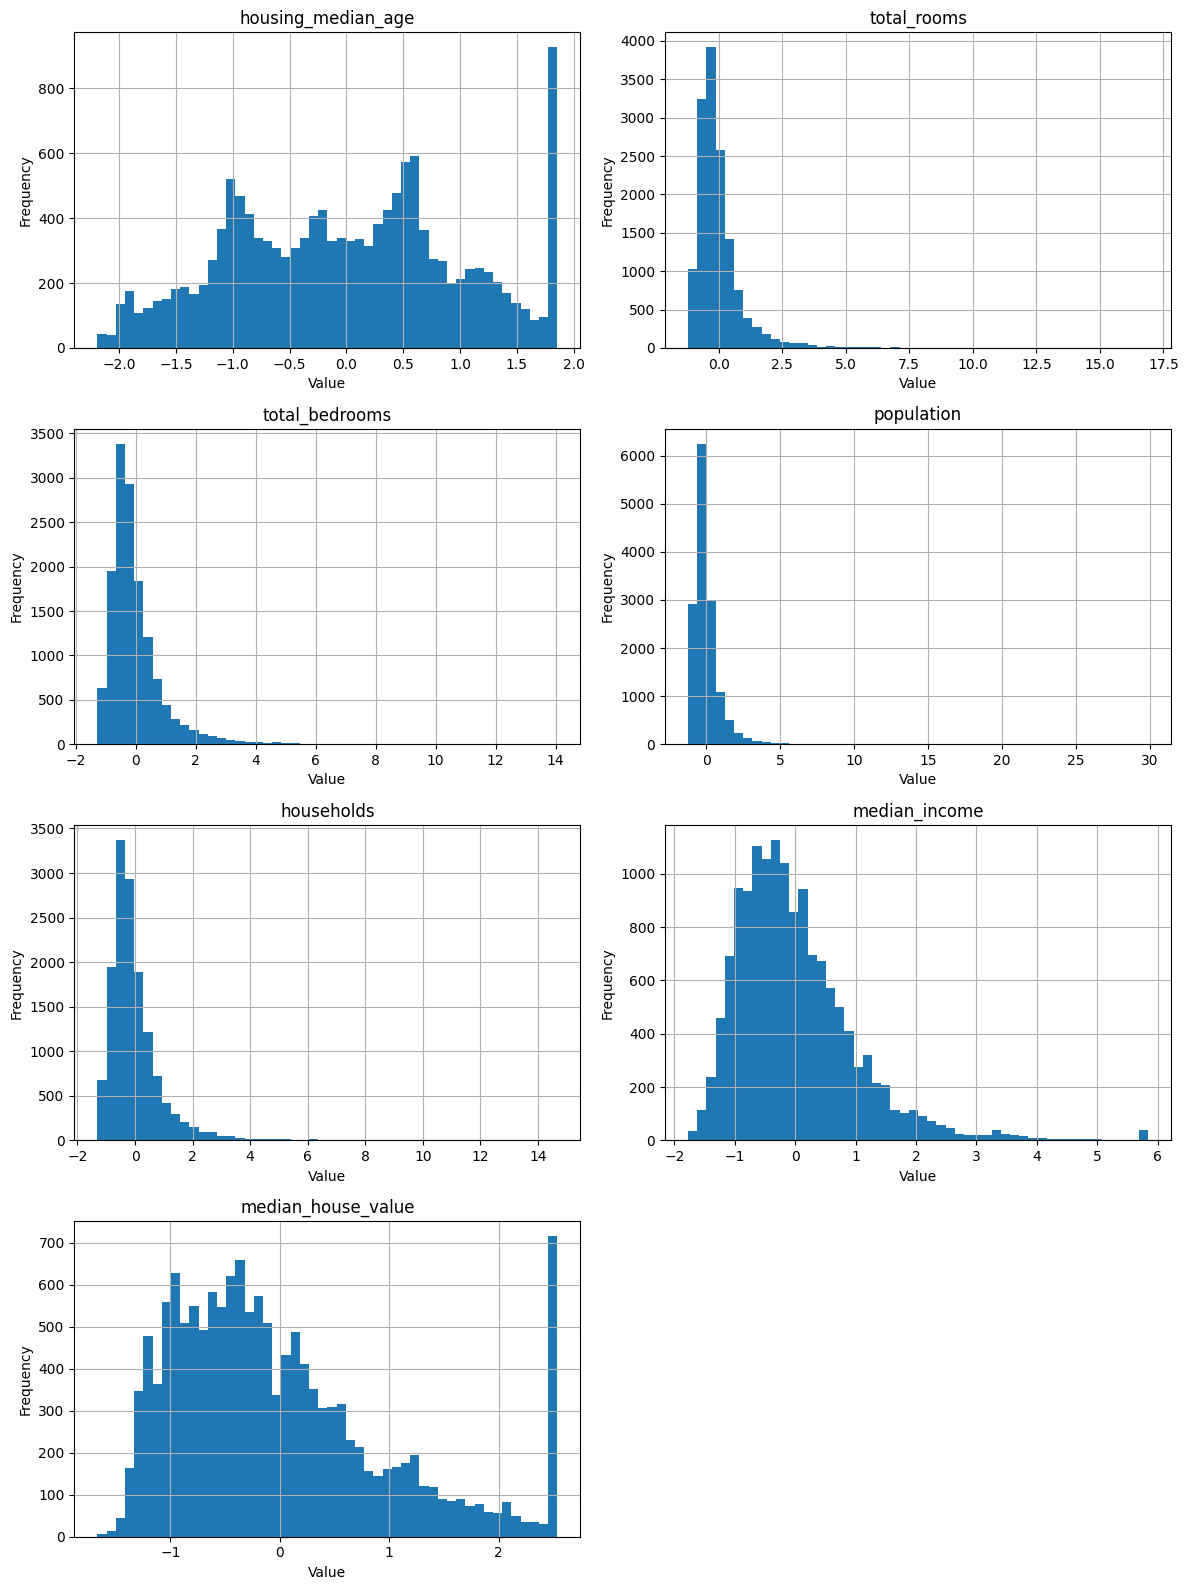

In [99]:
feature_names = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

X_train_df = pd.DataFrame(X_train, columns=cols)

# Converting scaled y_train back to a Series
y_train_series = pd.Series(y_train.flatten(), name='median_house_value')

# Plotting histograms for the specified features and y_train
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.ravel()  # Flatten the array of axes

# Plotting histograms for each specified feature
for i, col in enumerate(feature_names + ['median_house_value']):
    ax = axes[i]
    data = y_train_series if col == 'median_house_value' else X_train_df[col]
    data.hist(bins=50, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjusting layout and remove unused subplots
for i in range(len(feature_names) + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### c. Modelling

#### i. Employ Linear Regression from sklearn.linear_model, and instantiate the model.

In [100]:
# Importing package
from sklearn.linear_model import LinearRegression

# Instantiating the model
model = LinearRegression()

#### ii. Once instantiated, `fit()` the model using the scaled `X_train, y_train` data.

In [107]:
model.fit(X_train, y_train)

# Considering weights of features
coefficients=model.coef_.flatten()

feature_importance = pd.DataFrame(data={
    'Feature': cols,
    'Coefficient': coefficients
})

feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()

# Sorting the features by 'Absolute_Coefficient' in descending order
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

# Displaying the DataFrame
print(feature_importance)

                       Feature  Coefficient  Absolute_Coefficient
7                median_income     0.647880              0.647880
1                     latitude    -0.464731              0.464731
0                    longitude    -0.457954              0.457954
4               total_bedrooms     0.384863              0.384863
5                   population    -0.350110              0.350110
6                   households     0.127707              0.127707
3                  total_rooms    -0.122626              0.122626
2           housing_median_age     0.120422              0.120422
9       ocean_proximity_INLAND    -0.108360              0.108360
8    ocean_proximity_<1H OCEAN     0.055817              0.055817
12  ocean_proximity_NEAR OCEAN     0.047156              0.047156
10      ocean_proximity_ISLAND     0.021126              0.021126
11    ocean_proximity_NEAR BAY     0.020495              0.020495


#### iii. Employ the `predict()` function to obtain predictions on `X_test`. Store the predictions in a variable named `y_preds`. Note: Since the model has been trained on scaled data (i.e., both features and targets, the predictions will also be in the “scaled” space. We need to transform the predictions back to the original space).

In [46]:
# Storing predictions in y_preds
y_preds = model.predict(X_test)


#### iv. Use `inverse_transform()` function to convert the normalized data (`y_preds` ) to original scale. Store the transformed values back into `y_preds`.

In [47]:
# Using inverse transform to convert the normalized data
y_preds = scaler_target.inverse_transform(y_preds.reshape(-1, 1))

#### v. Perform PCA on the features (`X_train`) and set `n_component` as 2.

In [48]:
from sklearn.decomposition import PCA

# Create a PCA instance with 2 components
pca = PCA(n_components=2)

# Fit and transform the training data to 2D
X_train_pca = pca.fit_transform(X_train)

# X_train_pca now contains the training data in the reduced 2D space


1. Show a scatter plot where on the x-axis we plot the first PCA component and second component on the y-axis.

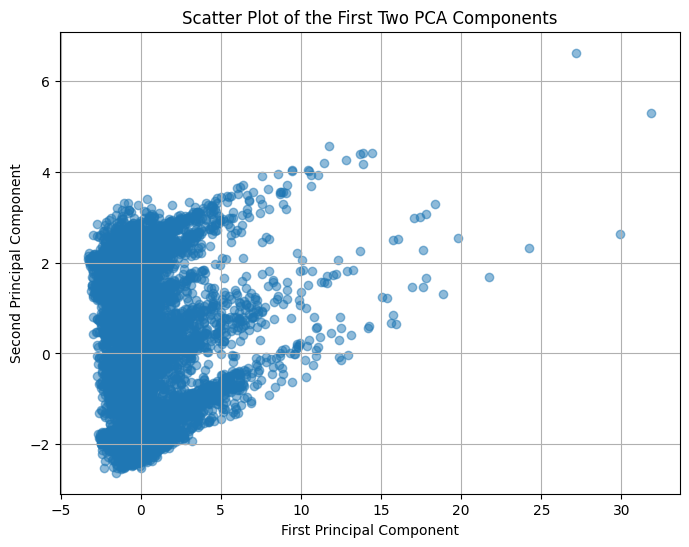

In [49]:
import matplotlib.pyplot as plt


# Creating a scatter plot of the first two principal components

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Scatter Plot of the First Two PCA Components')
plt.grid(True)
plt.show()


2. Calculate the total percentage of variance captured by the 2 PCA components using `pca.explained_variance_ratio_`. Also, report the strength of each PCA component using `pca.singular_values_`.

In [50]:
explained_variance_ratio = pca.explained_variance_ratio_

# Calculating the strength of each PCA component
singular_values = pca.singular_values_

# Total variance captured by the two components
total_variance = sum(explained_variance_ratio) * 100

# Outputing the results
print("Explained Variance Ratio of each component:", explained_variance_ratio)
print("Total Variance captured by the first two components: {:.2f}%".format(total_variance))
print("Singular Values of each component:", singular_values)


Explained Variance Ratio of each component: [0.30110561 0.19742525]
Total Variance captured by the first two components: 49.85%
Singular Values of each component: [236.61630546 191.59606813]


### d. Evaluation

#### i. Plot a scatter plot using matplotlib.pyplot.scatter function. Plot the predicted median house values on the y-axis vs the actual median house values on the x-axis

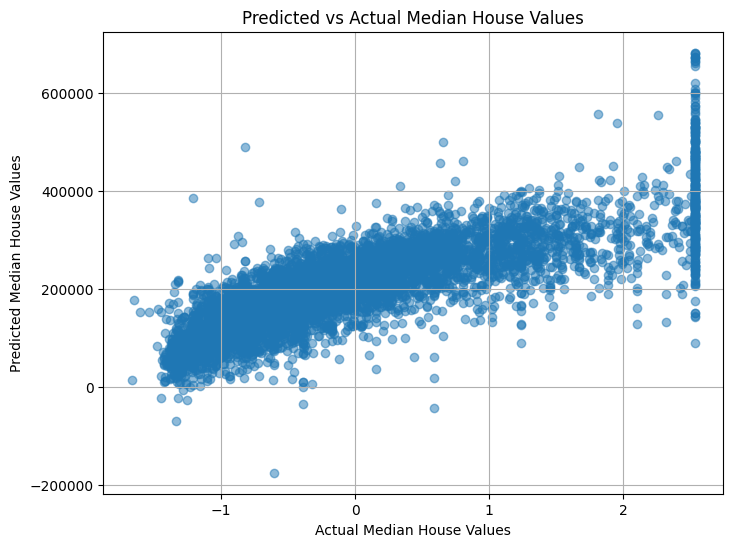

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_preds, alpha=0.5)
plt.xlabel('Actual Median House Values')
plt.ylabel('Predicted Median House Values')
plt.title('Predicted vs Actual Median House Values')
plt.grid(True)
plt.show()

#### ii. Calculate MAPE, RMSE and R2 for the model and report them in the following table.  
Hint: for RMSE set the squared parameter to False.

In [55]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score


# Calculating MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(y_test, y_preds)

# Calculating RMSE (Root Mean Squared Error) - set squared parameter to False
rmse = mean_squared_error(y_test, y_preds, squared=False)

# Calculating R2 (Coefficient of Determination)
r2 = r2_score(y_test, y_preds)

# Print the results
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)


Mean Absolute Percentage Error (MAPE): 1680878.5529624042
Root Mean Squared Error (RMSE): 225576.90897688302
R2 Score: -50848940798.17221
